# Sergio Saavedra
Tarea Support Vector Machine

# Descripción de la tarea

**Contexto**<BR>
En esta práctica realizaremos clasificación de imágenes con Support Vector Machine. Para ello, utilizaremos dos datasets: MNIST y Fashion-MNIST.

**MNIST**

*   Es un dataset de dígitos de MNIST (Modified-NIST, del Instituto Nacional de Estándares y Tecnología de EEUU).
*   Consta de 60.000 imágenes de entrenamiento y 10.000 de prueba. El tamaño de la imagen es de 28 x 28 píxeles. Cada imagen está etiquetada de 0 a 9 en función del dígito representado. 
*   Se utiliza como banco de pruebas para clasificar imágenes con algoritmos de Machine Learning.

**Fashion-MNIST**

*   Es un dataset de imágenes de artículos de moda de la empresa Zalando. Fue concebido para sustituir a MNIST porque requiere modelos de clasificación más complejos. 
*   Mantiene las características de MNIST en cuanto a número de imágenes (60.000 de entrenamiento y 10.000 de prueba), tamaño de las imágenes (28 x 28 píxeles) y número de clases (10). 
*   Se diferencia en el contenido de las imágenes: 10 tipos de artículos de moda, en lugar de los 10 dígitos.

El objetivo es comparar el resultado (accuracy) en función del dataset y el tipo de kernel SVM.
Teniendo en cuenta la información anterior, te pedimos realizar las tareas siguientes: 

**Dataset**

*   Cargar ambos datasets desde tensorflow.
*   Preprocesado: convertir las imágenes en vectores unidimensionales. 

**Modelos de SVM:**

*   Cargar el modelo de clasificador SVM de sklearn. 
*   Utilizar dos tipos de kernel: Lineal y Gausiano.

**Entrenar con 20.000 imágenes.<BR>
Probar con el dataset de prueba completo (10.000 imágenes).**

**Consideraciones:**

Para acortar el tiempo de entrenamiento con el kernel gaussiano, se aconseja 
*   Dejar el valor de gamma por defecto (“scale”).
*   Dejar el valor de probability por defecto (“False”).

# **Código**

In [ ]:
#Importación Librerías

import numpy as np
import pandas as pd

import tensorflow as tf

from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split

from time import time
import datetime

from sklearn.svm import SVC
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import learning_curve,GridSearchCV

from matplotlib import pyplot as plt
%matplotlib inline

Fashion-MNIST

In [ ]:
df2 = (X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


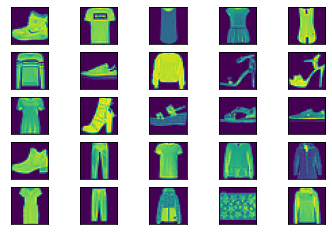

In [ ]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
plt.show() 

In [ ]:
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000,-1)
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
#Según enunciado tarea para n_train
n_train = 10000

x_train3 = X_train[0:n_train]
y_train3 = Y_train[0:n_train]

print (x_train3.shape)
print (y_train3.shape)

(10000, 784)
(10000,)


In [ ]:
parameters = [{'kernel': ['linear'], 'C': [1, 10, 100]},
                    {'kernel': ['rbf'], 'C': [1, 10, 100]}
                    
                    ]

timeIni = time()
grid = GridSearchCV(SVC(), parameters)
grid.fit(x_train3, y_train3)
timeEnd = time()
timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

print("La mejor parametrización para SVM: ", grid.best_params_)
print("Tiempo estimado requerido de cómputo: ", timeDiff)

La mejor parametrización para SVM:  {'C': 10, 'kernel': 'rbf'}
Tiempo estimado requerido de cómputo:  05:18:438764


In [ ]:
# El mejor modelo de kernel lineal

parameters = [{'kernel': ['linear'], 'C': [1, 10, 100]}]

timeIni = time()
grid = GridSearchCV(SVC(), parameters)
grid.fit(x_train3, y_train3)
timeEnd = time()
timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

print("La mejor parametrización para SVM: ", grid.best_params_)
print("Tiempo estimado requerido de cómputo: ", timeDiff)

La mejor parametrización para SVM:  {'C': 1, 'kernel': 'linear'}
Tiempo estimado requerido de cómputo:  02:59:770468


In [ ]:
# El mejor modelo de kernel gaussiano

parameters = [{'kernel': ['rbf'], 'C': [1, 10, 100]}]

timeIni = time()
grid = GridSearchCV(SVC(), parameters)
grid.fit(x_train3, y_train3)
timeEnd = time()
timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

print("La mejor parametrización para SVM: ", grid.best_params_)
print("Tiempo estimado requerido de cómputo: ", timeDiff)

La mejor parametrización para SVM:  {'C': 10, 'kernel': 'rbf'}
Tiempo estimado requerido de cómputo:  02:39:570387


In [ ]:
# Resultados modelos con kernel lineal

minAcc = 100
maxAcc = 0
rapidoAcc = 0
lentoAcc = 0
mejorTime = 0
peorTime = 0
minTime = 1000000000
maxTime = 0

mejorModelo = SVC()
peorModelo = SVC()
rapidoModelo = SVC()
lentoModelo = SVC()

from sklearn.metrics import confusion_matrix,classification_report

kernel = "linear"

for c in (1, 10, 100):
  print("Kernel lineal con C=", c)
  
  timeIni = time()
  modelo = SVC(kernel = kernel, C=c).fit(x_train3,y_train3)
  print(modelo)
  timeEnd = time()
  timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

  acc = modelo.score(X_test, Y_test)
  print("Precisión (accuracy): ", acc)
  print("Tiempo entrenamiento: ", timeDiff)

  predicciones = modelo.predict(X_test)
  print(classification_report(Y_test, predicciones))
  print("")
  print()

  if (maxAcc < acc):
      maxAcc = acc
      mejorTime = timeEnd-timeIni
      mejorModelo = modelo

  if (minAcc > acc):
      minAcc = acc
      peorTime = timeEnd-timeIni
      peorModelo = modelo

  if (timeEnd-timeIni > maxTime):
      lentoAcc = acc
      maxTime = timeEnd-timeIni
      lentoModelo = modelo

  if (timeEnd-timeIni < minTime):
      rapidoAcc = acc
      minTime = timeEnd-timeIni
      rapidoModelo = modelo

Kernel lineal con C= 1
SVC(C=1, kernel='linear')
Precisión (accuracy):  0.7964
Tiempo entrenamiento:  00:24:909156
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1000
           1       0.95      0.96      0.96      1000
           2       0.58      0.71      0.64      1000
           3       0.81      0.78      0.79      1000
           4       0.71      0.64      0.67      1000
           5       0.92      0.90      0.91      1000
           6       0.54      0.46      0.49      1000
           7       0.88      0.92      0.90      1000
           8       0.95      0.92      0.93      1000
           9       0.93      0.92      0.93      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



Kernel lineal con C= 10
SVC(C=10, kernel='linear')
Precisión (accuracy):  0.7964
Tiempo entrenamiento:  00:24:899386
       

In [ ]:
# Resultados modelos con kernel gausiano

minAcc = 100
maxAcc = 0
rapidoAcc = 0
lentoAcc = 0
mejorTime = 0
peorTime = 0
minTime = 1000000000
maxTime = 0

mejorModelo = SVC()
peorModelo = SVC()
rapidoModelo = SVC()
lentoModelo = SVC()
kernel = "rbf"

for c in (1, 10, 100):
  print("Kernel Gaussiano con gamma con C=", c)
  timeIni = time()
  modelo = SVC(kernel = kernel, C=c).fit(x_train3,y_train3)
  print(modelo.fit(x_train3, y_train3))
  timeEnd = time()
  timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

  acc = modelo.score(X_test, Y_test)
  print("Precisión (accuracy): ", acc)
  print("Tiempo entrenamiento: ", timeDiff)

  predicciones = modelo.predict(X_test)
  print(classification_report(Y_test, predicciones))
  print("")
  print()

  if (maxAcc < acc):
      maxAcc = acc
      mejorTime = timeEnd-timeIni
      mejorModelo = modelo

  if (minAcc > acc):
      minAcc = acc
      peorTime = timeEnd-timeIni
      peorModelo = modelo

  if (timeEnd-timeIni > maxTime):
      lentoAcc = acc
      maxTime = timeEnd-timeIni
      lentoModelo = modelo

  if (timeEnd-timeIni < minTime):
      rapidoAcc = acc
      minTime = timeEnd-timeIni
      rapidoModelo = modelo

Kernel Gaussiano con gamma con C= 1
SVC(C=1)
Precisión (accuracy):  0.8531
Tiempo entrenamiento:  00:16:835789
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.75      0.79      0.77      1000
           3       0.82      0.88      0.85      1000
           4       0.76      0.77      0.77      1000
           5       0.94      0.93      0.94      1000
           6       0.64      0.59      0.62      1000
           7       0.91      0.92      0.91      1000
           8       0.96      0.96      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Kernel Gaussiano con gamma con C= 10
SVC(C=10)
Precisión (accuracy):  0.8667
Tiempo entrenamiento:  00:15:711483
              p

In [ ]:
# Resultados

print("El mejor modelo es: ", mejorModelo.kernel)
print(mejorModelo)
print("Accuracy: ", maxAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(mejorTime).strftime("%M:%S:%f"))
print()

print("El peor modelo es: ", peorModelo.kernel)
print(peorModelo)
print("Accuracy: ", minAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(peorTime).strftime("%M:%S:%f"))
print()

print("El modelo más rápido es: ", rapidoModelo.kernel)
print(rapidoModelo)
print("Accuracy: ", rapidoAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(minTime).strftime("%M:%S:%f"))
print()

print("El modelo más lento es: ", lentoModelo.kernel)
print(lentoModelo)
print("Accuracy: ", lentoAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(maxTime).strftime("%M:%S:%f"))

El mejor modelo es:  rbf
SVC(C=10)
Accuracy:  0.8667
Tiempo:  00:15:711483

El peor modelo es:  rbf
SVC(C=1)
Accuracy:  0.8531
Tiempo:  00:16:835789

El modelo más rápido es:  rbf
SVC(C=10)
Accuracy:  0.8667
Tiempo:  00:15:711483

El modelo más lento es:  rbf
SVC(C=1)
Accuracy:  0.8531
Tiempo:  00:16:835789
